<cite data-cite="9112711/NTEXEY3I"></cite># Title

 ### Contributor1FirstName  Contributor1LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID) 
Institution

### Contributor2FirstName  Contributor2LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID_IF_EXIST) 
Institution

### Contributor3FirstName  Contributor3LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID_IF_EXIST) 
Institution

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


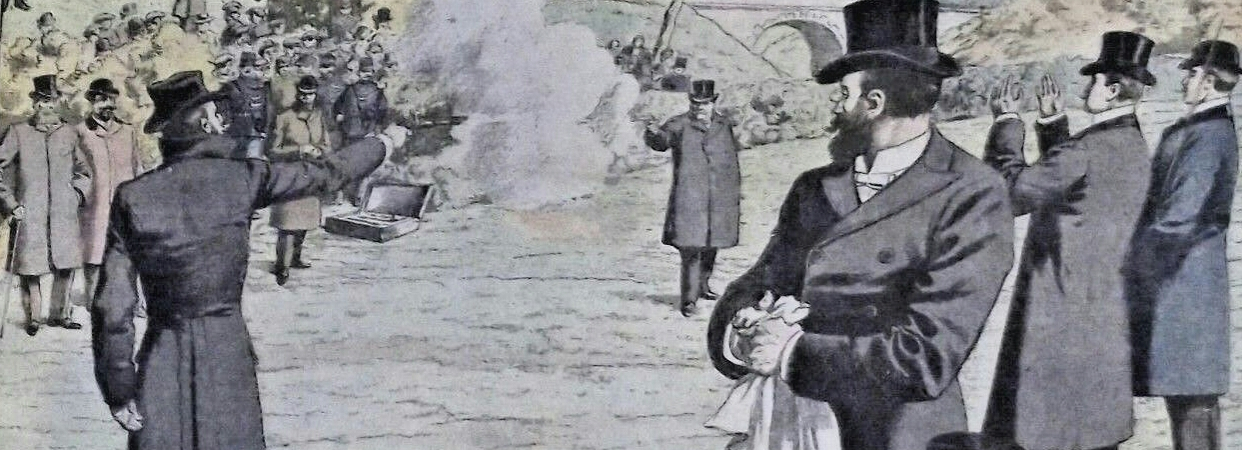

In [1]:
from IPython.display import Image, display
import os
path_to_media = "media"

display(Image(os.path.join(path_to_media, "Duel.jpg")))

 (optional) This article was orginally published (...)

FirstKeyword, SecondKeyword, AlwaysSeparatedByAComma

This is an abstract (...)

TO DO : 
- Mieux organiser les librairies et ajouter un descriptif pour chacune d'entre elles
- Refaire l'OCR de la figure 1
- migration des données
- Discuter de la partie SOM (je n'arrive pas à charger le modèle sauvegardé)
- Rajouter les Caption pour les figures plotly
- Pour les Tableaux Markdown : il faut directement ajouter le titre de la table dans le metadata de la cellule jupyter
- Pour la partie Topic Modelling : on utilise bien les nouveaux topics qu'on avait trouvé pour le précédent articles ? ce sont eux que j'ai ajouté, comme on avait sauvegardé le modèle on peut les recharger. De toute façon on avait aussi saauvegardé la table des topics et la tables du poids des topics dans chaque documents

## Introduction

### Aim of this paper

In the field of digital humanities, the great concern is to build an accurate, reliable and useful digital representation of analogical material. For that
reason, methodological papers focus on the main steps of that process : digitalization, layout detection, character recognition, spelling correction, names
recognition, text encoding, design of ontologies. Natural Language Processing and Automatic Classification can be of some use, for instance when it
comes to detecting errors – actually, NLP techniques are built-in parts of
modern OCR algorithms. However, they are mostly seen as tools, and thus
their efficiency is assessed in a pretty straightforward way : how accurate is
the result they provide with regard to the initial material.  

When it comes to research in Data Science though, things can get quite
tricky. There is hardly a unified framework to answer questions such as : is
topic modeling giving me good insights about the evolution of the concerns
my corpus deals with over time ? What is a relevant division of my corpus
according to time periods, geographical zones, political lines ? More generally,
it might be quite difficult to be sure that the insights we get from exploratory
analysis are not misleading, especially when we are dealing with amounts of
data that make direct verifications virtually impossible.

In this paper, we aim to address several kinds of problems that historians
have to consider when dealing with large amounts of digital data :
- how can we select relevant data throuh huge amounts of materials ?
- what kind of visualization might give the best insights about the dispersion of the data ?
- how is it possible to come with meaningful variables and to classify the data to a high degree of certainty ?
- what is a relevant method to display evolutions throughout time ?

<div class="cite2c-biblio"></div>

### Previous works and perspectives

### Outline

This article is divided into three sections. In the first section,
we start tackling the high dimension through the angle of visualization : how to represent information in a way which is meaningful and as little misleading as it is possible – both for exploration and explanation purposes. In the second section, we investigate some methods which are specific to NLP and help building accurate variables beyond the simple frequencies. Finally, the third section is devoted to the analysis of the time component in different kind of corpora.

### Data

Although this paper is mostly a methodology paper, we will focus on one single source, namely the parliamentary reports from french Third Republic. We hope to show some insights about the corpus that researchers in political history might find interesting per se.

From 1881 to 1940 and the fall of the Republic, the debates in the lower chamber of french Parliament have been recorded and published in the Journal Officiel. In the early 2010s, the archivists from the french national library (BNF) have digitalized these texts, stored them in a freely accessible database on Gallica[REF], together with some precious metadata, and finally performed automatic transcription (OCR) on them. They have made available online these texts in XML format[REF]; hereafter we will refer to this corpus as OCR-12. However, these transcriptions were not manually proofread, and, due to the early technology that was used back then, were not absolutely accurate (see figure 1). Thanks to grants from BNF-Datalab and INRIA and with the help of some preprocessing and OCR tools developed by Epita LRDE lab[REF], we have been able to come up with a new version of the transcription with greater accuracy, though only for the period XX-XX. Many examples in this article are taken from that recent transcription, which we call OCR-21, while for some long-term analysis we will have to use OCR-12.


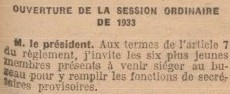

In [3]:
from IPython.display import Image, display
metadata_1 = {
    "jdh":{"module": "object", "object": {"type": "image","source": ["figure X: Original (digitalized) text"]}}
}
display(Image(os.path.join(path_to_media, "jo33.jpg"), width=600), metadata=metadata_1)

| OCR-12 version | OCR-21 version
|---|---|
|OUVERTURE DE LA SESSION ORDINAIRE DE 1933 M. le président. Aux termes de l’article 7 5U règlement, j’invite les six plus jeunes Sfâinbres présents à venir siéger au buu pour y remplir les fonctions do secrér "V.l !lles provisoires.|OUVERTURE DE LA SESSION ORDINAIRE DE 1933 M. le président. Aux termes de l’article 7 du règlement, j’invite les six plus jeunes membres présents à venir siéger au bureau pour y remplir les fonctions de secrétaires provisoires.|



## The dimension problem, part 1 : Visualization

In many social sciences, we are used to dealing with tabular data. Any
data unit can be seen as a vector in some multi-dimensional space. For instance, our corpus can be described as a table of pages, with some meta-data
information, and for every word of the vocabulary the number of occurences
within the page ([Table X](#table-X)). When it comes to this kind of representation, the
dimension of the space can be huge, tens of thousands of columns. Hence it
is difficult to provide a 2-D visualisation of that data, for instance for the
purpose of understanding which pages have similar content, deal with the
same topics, or might have been written in close context.

|page|date|"président"|"terme"|"article"|"règlement"|...|
|---|---|---|---|---|---|---|
6829|1933-01-10|24|1|5|3|...|

In [4]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install --upgrade cython
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install Pillow==6.2.0
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install minisom==2.3.0
!{sys.executable} -m pip install pickle-mixin
!{sys.executable} -m pip install kaleido
!{sys.executable} -m pip install openpyxl

In [5]:
!{sys.executable} -m pip install hdbscan==0.8.27
#!{sys.executable} -m pip install top2vec

  Using cached hdbscan-0.8.27.tar.gz (6.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for hdbscan (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [30 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-37
      creating build/lib.linux-x86_64-cpython-37/hdbscan
      copying hdbscan/hdbscan_.py -> build/lib.linux-x86_64-cpython-37/hdbscan
      copying hdbscan/flat.py -> build/lib.linux-x86_64-cpython-37/hdbscan
      copying hdbscan/prediction.py -> build/lib.linux-x86_64-cpython-37/hdbscan
      copying hdbscan/plots.py -> build/lib.linux-x86_64-cpython-37/hdbscan
      copying hdbscan/robust_single_linkage_.py -> build/lib.linux-x86_64-cpython-37/hdbscan
      copying hdbscan/validity.py -> build/lib.linux-x86_64-

In [6]:
# basic libraries
import os
from typing import Tuple, List, Dict, Any, TextIO
import pandas as pd
import numpy as np
import openpyxl
import re
from datetime import datetime, date

# graphics
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt, cm
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
fig = px.colors.sequential.swatches_continuous()
colors =["black"]+px.colors.sequential.Turbo+["red"]
from plotly.subplots import make_subplots
from matplotlib import dates as mdates

# NLP packages
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import FreqDist, NaiveBayesClassifier
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# machine/deep learning models
from sklearn.cluster import AgglomerativeClustering, KMeans # clustering algorithms
from sklearn.decomposition import PCA, LatentDirichletAllocation # topic modelling
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler # scaling data
from sklearn.feature_extraction.text import CountVectorizer # counting word frequencies
from scipy.cluster.hierarchy import dendrogram # plotting dendogram
from sklearn.decomposition import PCA
import minisom
#from top2vec import Top2Vec
import pickle  # saving and downloading IA models
import kaleido

import warnings
warnings.filterwarnings('ignore') # remove warnings

path_to_data = "data"
path_to_big_data = "nlp_data"
path_to_model = os.path.join(path_to_data, "model_ML")

In [7]:
def moving_average(data: List[float], periode: int):
    return np.convolve(np.array(data), np.ones(periode), 'valid') / periode

def ngram(forms: List[str]):
    period: int = 24
    fig = plt.figure(figsize=(15, 10))
    comptage: Dict[str, List[int]] = {word: list() for word in forms}
    dates: List[date] = list()
    for session_file_adr in sorted(os.listdir(os.path.join(path_to_data, "comptage_lemmes"))):
        dates.append(datetime.strptime(re.split("\.|_",session_file_adr)[0], '%Y-%m-%d').date())
        session_compteur = pd.read_csv(os.path.join(path_to_data, "comptage_lemmes", session_file_adr),
                                       sep=";", encoding="utf-8").set_index("Unnamed: 0")
        taille: int = session_compteur.sum()
        for word in forms:
            comptage[word].append(session_compteur.loc[word].values[0] / taille.values[0] if word in session_compteur.index else 0)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
    for word in forms:
        plt.plot(dates[period:-period], moving_average(comptage[word], 2*period+1), label=word)
    plt.legend()
    plt.gcf().autofmt_xdate()
    #plt.savefig(r"media\frequences.png")
    plt.close()
    caption_content = "Figure X: évolution de la fréquences des mots à travers les années"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

In [8]:
ngram(["communiste", "ordre", "boulanger", "eglise", "guerre"])

FileNotFoundError: [Errno 2] No such file or directory: 'data/comptage_lemmes'

<Figure size 1080x720 with 0 Axes>

### Limits of PCA

Among the most popular tools is the Principal Component Analysis
(PCA). Basically the PCA performs a rotation inside the data space, in
such a ways that i-th axis has maximal variance among the subspace where
axis 1 to i − 1 have been removed. This might come in handy when the first
axes are able to capture a significant part of the overall variance, as it is often
the case with small-dimension or highly-correlated data. However, when it
comes to textometry, such conditions are not met so frequently, and thus the
tool can be misleading.

[Figure X](#figure-X) is an example of such a confusion. Here we are displaying the
results of a PCA trained on the documents issued in 1882 – their names
are encoded in the format **MONTH-DAY** (+_num in case of several documents in a single day), based on the frequency of words in each text.
We can ignore the colors for the moment and focus on the proximity of
some nodes. Formally, the distance between two documents is equal to the
sum of the squares of differences in frequencies over all the vocabulary $D(a,b) = \sum_{w \in \mathcal{V}} (f_w(a)-f_w(b))^2$
.  
Although they look very close in the PCA
the documents 02-23 and 02-13 are actually quite distant as we can see from
[Table X](#table-X). Symmetrically, the documents 02-23 and 05-11 are shown at long
distance from each other in the PCA while they are actually closer neighbors
than the previous pair.

These false impressions could be corrected by looking at the other axes
from the PCA – here the third one mostly, but watching simultaneously
several graphs and pondering them with the contribution of every axis does
not make the PCA a very practical tool for understanding proximities on a
global scale. Therefore, we want to emphasize the importance of two methods
that may be good replacements or complements to PCA, namely : non-linear
transforms and automatic clustering.

In [ ]:
matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                encoding="utf-8", header=0).rename({"Unnamed: 0": "document"}, axis=1).set_index("document")
matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
matx_occurrences = matx_occurrences.transpose().applymap(lambda x : int(x))


caption_content = "table X: extract of the frequency matrix for the year 1882"
display(matx_occurrences.iloc[:5,:5].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
# fonction to classify our data
def cha_freq(export: bool) -> Tuple[AgglomerativeClustering, AgglomerativeClustering]:
    #print("classification des fréquences")
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                                                 encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    if export:
        matx_cpy: pd.DataFrame = matx_occurrences.copy()
        matx_cpy = pd.DataFrame(MinMaxScaler().fit_transform(matx_cpy), index=matx_cpy.index, columns=matx_cpy.columns)
        print(matx_cpy.head())
        distances: pd.DataFrame = pd.DataFrame(np.zeros((len(matx_cpy.columns), len(matx_cpy.columns))),
                                               columns=matx_cpy.columns, index=matx_cpy.columns)
        for i, data1 in enumerate(distances.columns):
            matches = [co for j, co in enumerate(distances.columns) if j > i]
            for data2 in matches:
                x = sqrt(matx_cpy.loc[:, data1].subtract(matx_cpy.loc[:, data2]).apply(lambda z: z ** 2).sum())
                distances.loc[data1, data2] = x
                distances.loc[data2, data1] = x
        print(distances.head())
        distances.to_csv(os.path.join(path_data, "distances_1882.csv"), sep=";", encoding="utf-8")

    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)
    distances = np.vectorize(lambda x: 1 - x)(proximity)
    #print(distances.shape)
    #np.savetxt("distances.csv", distances, delimiter=";")

    #print("calcul CHA")
    n_clusters_w = 12
    n_clusters_c = 8
    cha: AgglomerativeClustering = AgglomerativeClustering(n_clusters=n_clusters_w,
                                                           linkage="ward", compute_distances=True)
    cha.fit(distances)
    
    cha2: AgglomerativeClustering = AgglomerativeClustering(n_clusters=n_clusters_c,
                                                            linkage="complete", compute_distances=True)
    cha2.fit(distances)
    
    return cha , cha2

def acp_freq(cha: AgglomerativeClustering) :
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                                                 encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)
    #print("calcul ACP")
    pca = PCA()
    XP = pca.fit_transform(proximity)
    #print(XP.shape)
    #print("variance expliquée", pca.explained_variance_ratio_)
    features: List[str] = [date[5:] for date in matx_occurrences.index]
    #print("features", features)
    for axe in range(1):
        fig = plt.figure(figsize=(10, 10))
        plt.scatter(XP[:, 2 * axe], XP[:, 2 * axe + 1], edgecolors="none",c=cha.labels_, marker="o", cmap="tab10",
                    s=60)
        for j, feature in enumerate(features):
            if feature in ["02-23", "05-11", "02-13", "02-23_1", "05-11_1", "02-13_1"]:
                plt.annotate(xy=(XP[j, 2 * axe] + 0.01, XP[j, 2 * axe + 1]), text=feature)
        plt.savefig(r"media\pca_1882.png")
        plt.close()
        caption_content = "Figure X: First two components of the PCA on the 1882's documents"
        display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})
    return pca

In [ ]:
cha_w , cha_c = cha_freq(export=False)
pca = acp_freq(cha_w)

In [ ]:
distances_1882 = pd.read_csv(os.path.join(path_to_data,"distances_1882.csv"),sep=";",index_col=0)
caption_content = "table 4: DIstance beetween the document 02-23 and other documents"
display(distances_1882.loc[["1882-02-23","1882-02-23_1","1882-05-11","1882-05-11_1","1882-07-18","1882-07-18_1","1882-02-13","1882-02-13_1"],
       ["1882-02-23"]].style.set_caption(caption_content).format("{:.4}"),metadata={"jdh":{"object":{"source": [caption_content]}}})

Contrary to what its seems in the PCA, the documents 02-23 and 02-13 are actually quite distant and 02-23 is much closer to 05-11.

#### PCA and explained variance ratio

We see in [figure X](#figure-X) the cummulative explained variance ration. Our first two components explain only a fraction of the overall informations. PCA seems not enough

TO-DO  : intêret de rajouter le explained variance ratio ?

In [ ]:
x = [i for i in range(len(pca.explained_variance_ratio_))]
y = np.cumsum(pca.explained_variance_ratio_)
fig = go.Figure([go.Bar(x=x, y=y)])
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))

fig.update_layout(go.Layout(autosize=False,width=1000,height=600),
    title={
        'text': "Cummulative Explained Variance Ratio",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
        ,template="simple_white",
    legend=dict(yanchor="top",y=1,xanchor="left",x=1,traceorder="reversed"),
    legend_title_text="") 

fig.update_xaxes(title_text = "Principal Components",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_yaxes(range=[0,1],dtick=0.1,tick0=0,title_text = "explained variance ratio",
        title_font = {"size": 15},
        title_standoff = 25,
        showgrid=True)

# fig.write_image(r"media\pca_explained_variance_ration.png")
caption_content = "Figure X: First two components of the PCA on the 1882's documents"
display(fig.show(), metadata={"jdh":{"object":{"source": [caption_content]}}})

### Non Linear methods

As a first example of a non linear method, we focus on the corps of all the parlementary debates from  1880 to 1889. We apply *Word2Vec*, which is an algorithm that transforms every word (token) from the corpus into a vector. The mapping works by looking a the cooccurences of the words, in such a way that words used in a similar context will be close with respect to the the cosine similarity of the vectors

In [ ]:
from gensim.models import Word2Vec
w2v_model = Word2Vec.load(os.path.join(path_to_big_data,"word2vec.model"))
#w2v_model.wv.doesnt_match(["armée","viande","vin"])

We create a list of base words and we are looking for there closest words, our goal is to vusualize them and to see if dimension reduction will word.

We select words related to 8 subjects : Vatican, train, wine, divorce, victim, law, colony and pedagogy. Ideally those groupds of words will form distinct clusters.

In [ ]:
base_words: List[str] = ["vatican","train","vin","divorce","victime","loi","colonie","pédagogique"]
colors: Dict[str,str] = {base_word : color for base_word, color in zip(base_words,["red","blue","green","black","pink","orange","grey","purple"])}

list_of_words: List[str] = [x[0]  for word in base_words for x  in w2v_model.wv.most_similar([word])]
clusters: Dict[str, List[str]] = {base_word : [x[0] for x in w2v_model.wv.most_similar(base_word)] for base_word in base_words}
word_vectors: np.ndarray = np.array([w2v_model.wv.__getitem__([w])[0] for w in list_of_words])

In [ ]:
pca = PCA().fit(word_vectors)
x = [i for i in range(len(pca.explained_variance_ratio_))]
y = np.cumsum(pca.explained_variance_ratio_)
fig = go.Figure([go.Bar(x=x, y=y)])
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))

fig.update_layout(go.Layout(autosize=False,width=600,height=400),
    title={
        'text': "Cummulative Explained Variance Ratio",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
        ,template="simple_white",
    legend=dict(yanchor="top",y=1,xanchor="left",x=1,traceorder="reversed"),
    legend_title_text="") 

fig.update_xaxes(title_text = "Principal Components",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_yaxes(range=[0,1],dtick=0.1,tick0=0,title_text = "explained variance ratio",
        title_font = {"size": 15},
        title_standoff = 25,
        showgrid=True)

#fig.write_image(r"media\pca_explained_variance_ration.png")
caption_content = "Figure X: blabla"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
pca_model: np.ndarray = PCA().fit_transform(word_vectors)[:,:2]
x: np.ndarray = pca_model[:,0]
y: np.ndarray = pca_model[:,1]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x, y=y,
    hoverinfo='x+y',
    mode='markers',name="",
    marker_color=[colors[[k for k, v in clusters.items() if word in v][0]] for word in list_of_words]
))
for i , w in enumerate(list_of_words) :
    fig.add_annotation(x=x[i], y=y[i],
                text=w,
                showarrow=False,
                align="right",
                yshift=10,
                xshift=-40)
fig.update_yaxes(title_text = "",
        title_font = {"size": 15},
        title_standoff = 25)
fig.update_xaxes(
        tickangle = 0,
        title_text = "",
        title_font = {"size": 15},
        title_standoff = 25)
fig.update_layout(go.Layout(autosize=False,width=900,height=900),
                  title={
        'text': "",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                 legend=dict(yanchor="top",y=1,xanchor="left",x=0.9),template="simple_white",
                 showlegend=False) 

fig.write_image(os.path.join(path_to_media,"word2vec_scatter.png"))
caption_content = "Figure X: Word2Vec + PCA"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})
#fig.show()

When using a PCA to represents our words we see clear groups of similar words : One for alcohol, one for the Vatican, one for trains and one for the Law. Yet we also have a big cluster mixing words from pedagody, colonies, victims, divorce. Clearly PCA was not able to separate these different topics in several clusters. We need to improve this visualisation.

For that we will use a non linear algorithm : t-SNE.

#### t-SNE

t-SNE is a dimension reduction algorithm using a non-linear method. It's not a projection method since it does'nt use any function tu project data (therefore no linear fuction is used). It optimizes position of points in a n-dimensions space into a 2 dimension space by  fitting a density probability on the n-dimension space and another in a 2 dimension space. Then it used the KL distance to minimize the distance beetween those two density

When applying t-SNE to the same words we get :

In [ ]:
base_words = ["vatican","train","vin","divorce","victime","loi","colonie","pédagogique"]
colors = {base_word : color for base_word , color in zip(base_words,["red","blue","green","black","pink","orange","grey","purple"])}
list_of_words = [x[0]  for word in base_words for x  in w2v_model.wv.most_similar([word])]
d = {base_word : [x[0] for x in w2v_model.wv.most_similar(base_word)] for base_word in base_words}
word_vectors = np.array([w2v_model.wv.__getitem__([w])[0] for w in list_of_words])

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(word_vectors)

x = new_values[:,0]
y = new_values[:,1]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x, y=y,
    hoverinfo='x+y',
    mode='markers',name="",
    marker_color=[colors[[k for k, v in d.items() if word in v][0]] for word in list_of_words]
))

for i , w in enumerate(list_of_words) :
    fig.add_annotation(x=x[i], y=y[i],
                text=w,
                showarrow=False,
                align="right",
                yshift=10,
                xshift=-40)

fig.update_yaxes(title_text = "",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_xaxes(
        tickangle = 0,
        title_text = "",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_layout(go.Layout(autosize=False,width=900,height=900),
                  title={
        'text': "",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                 legend=dict(yanchor="top",y=1,xanchor="left",x=0.9),template="simple_white",
                 showlegend=False) 

#fig.write_image(os.path.join(path_to_media,"word2vec_scatter.png"))
caption_content = "Figure X: Word2Vec + PCA"
display(fig.show(),metadata={"jdh":{"object":{"source": [caption_content]}}})
fig.show()

This method was abled to clearly create distinc clusters. Note that the word *Widow* from the group of words *victim* is also close to the cluster for *divorce*

#### SOM

A Self-Organizing Map (SOM) is a non-linear and stochastic projection
of the data space on a low-dimension (usually 2-D) grid [REF]. The SOM
algorithm is an iterative algorithm, which takes as input a dataset and computes units (the cells of the grid) which define the map. The grid is at first
dispatched randomly in the dataspace ; then a sequence of steps is computed.
At every step, one data is chosen at random and attributed to the closest
cell, which is moved in the dataspace in order to have the data in the center
of the cell. Neighboring cells are also moved in that direction, though along
only a fraction of the distance. One could think to the grid as if it was drawn
on a piece of fabric twisted by pushing a finger on some point. We know
that self-organization is reached at the end of the algorithm, which implies
that close data in the input space have to belong to the same class or to
neighboring classes, that is to say that they are projected on the same cells
or on neighboring cells on the map (see Figure 6 for an example).

Notice that the reciprocal is not true : as any dimension reduction method, a SOM can produce fake similarity.[TODO mentionner alternatives,
comme gaz] In order to tackle this problem, we can introduce additional visualisation elements. First one is the distance between cells, as it is displayed
on Figure 6. The distance between a cell and its neighbors is highlighted by
the gray scale : the darker, the further. Another efficient tool is clustering,
also called unsupervised classification.

In [ ]:
import minisom
def som_freq(cha: AgglomerativeClustering):
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_1882_corr.csv"), sep=";",
                                                 encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)
    features: List[str] = [date[5:] for date in matx_occurrences.index]
    print("calcul SOM")
    n_neurons: int = 14
    m_neurons: int = 14
    som: minisom.MiniSom = minisom.MiniSom(n_neurons, m_neurons, proximity.shape[1], sigma=5, learning_rate=.5,
                                           neighborhood_function='gaussian')
    som.pca_weights_init(proximity)
    som.train(proximity, 2000, verbose=True)
    
    distances_map = som.distance_map()
    #print(distances_map)
    cases: Dict[Tuple[int, int], List[int]] = {(xn, yn): list() for xn in range(n_neurons) for yn in range(m_neurons)}
    for num_data, xx in enumerate(proximity):
        cases[som.winner(xx)].append(num_data)
    #print(cases)
    plt.figure(figsize=(14, 14))
    plt.xlim(0, n_neurons)
    plt.ylim(0, m_neurons)
    plt.yticks([])
    plt.xticks([])
    cmap = cm.get_cmap('tab10')
    for case in cases:
        plt.scatter(x=case[0] + 0.5, y=case[1] + 0.5, marker="s", s=2600, c=str(distances_map[case]))
        if len(cases[case]) > 0:
            for axe, t in enumerate(cases[case]):
                plt.annotate(xy=(case[0] + .15, case[1] + .8 - axe / 5), text=features[t], fontsize="small",
                             color="black" if distances_map[case] > 0.5 else "white", fontweight="heavy")
    #plt.savefig(os.path.join(path_data, "som_freq.png"))
    plt.close()
    caption_content = "Figure X: PLACE HOLDER"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})
    return

In [ ]:
with open(os.path.join(path_to_data, "SOM_freq_clusters.p"), 'rb') as infile:
        som: minisom.MiniSom = pickle.load(infile)

In [ ]:
som_freq(cha_w)

### Clustering as a tool for visualization

The aim of a clustering is to divide a dataset in clusters of vertices that
are close to each other, according to some metrics. A clustering can be illustrated by a choice of colors, shapes or markers, each coding for a different
class. The borders of these classes are not only providing additional information to the graph, but can also help spotting problems. For instance, the
colors in Figure 5 represents the different classes from an Agglomerative
Clustering with 8 components. The orange, violet and lightblue dots seem
very intricated, while they are in reality pretty well divided apart
. Similar
information could be added on the Self-Organizing map in Figure 6.


In [ ]:
def clustering_acp(year = 1882) : 
    year = 1882
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_annees", f"comptage_{year}.csv"),
                                                 sep=";", encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)
    distances = np.vectorize(lambda x: 1 - x)(proximity)

    cha : AgglomerativeClustering = AgglomerativeClustering(n_clusters=2, linkage="ward")
    cha.fit(proximity)
    cha_colors = ["orange" if l == 0 else "green" for l in cha.labels_]

    km : KMeans = KMeans(n_clusters=2,random_state=1)
    km.fit(proximity)
    km_colors = ["orange" if l == 0 else "green" for l in km.labels_]
    
    pca = PCA()
    XP = pca.fit_transform(proximity)

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
    ax1.scatter(XP[:, 0], XP[:, 1], edgecolors="none", marker="o", cmap="tab10", s=60, c=cha_colors)
    ax2.scatter(XP[:, 0], XP[:, 1], edgecolors="none", marker="o", cmap="tab10", s=60, c=km_colors)
    ax1.title.set_text("figure 4a: Agglomerative Clustering")
    ax2.title.set_text("figure 4b: K-Means")
    plt.savefig(r"media\clustering_1882.png")
    plt.close()
    caption_content = "Figure X: Clustering of the 1882 texts into two classes according to different algorithms"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
clustering_acp(1882)

### Assessing the quality of a clustering

There exist dozens of methods to perform such a clustering, and deciding
which one better suits a given dataset can be uneasy. First, notice that we
are dependent on the variables that we have used to build the corpus in the first place, since the quality of a clustering is always according to some
measurement. For instance, here even the best clustering tool would fail at
classifying all texts about colonial affairs in a single cluster, for the problems
lie in the decision to use word frequencies as initial variables. We will deal
with that problem in the next chapter ; for now let us focus on building a
good clustering according to a given set of variables.

It is important to keep in mind that different algorithms will fit different
kinds of data shapes (see Figure 7). For instance, agglomerative clustering,
since it works by merging the closest clusters one pair at a time will be
sensitive to big gaps in the data ; thus the clusters will usually have neat
borders but possibly strange shapes and inbalanced sizes. On the other hand,
k-Means works with geometric shapes (Voronoï diagrams) ; hence the clusters
tend to have more regular shapes but fuzzier borders.


When it comes to clustering, the main thing we are looking for is dividing
the space into coherent clusters. That means, they should be far apart from
each other, which states that the division was necessary ; in addition the
distances inside one cluster should remain as small as possible, so that no
more subdivision should be required. Thus we can define objective functions
that keep that under control. On Figure 8 we see (for two different measures)
the increase in the function every time we merge two clusters into a single
one. In the beginning, increases are pretty moderate, indicating that further
clustering is required. At some point there is a sound inflexion, which is the
sign that past that limit clusters are too far away from each other to be
combined without a big loss of information.

In [ ]:
def optimal_cluster(cha : AgglomerativeClustering, cha2 : AgglomerativeClustering):
    n_clusters_w = cha.n_clusters
    n_clusters_c = cha2.n_clusters    
    fig = plt.figure(figsize=(12, 8))
    plt.plot(range(len(cha2.distances_)), cha.distances_, label="complete linkage")
    plt.plot(range(len(cha2.distances_)), cha2.distances_, label="Ward linkage")
    ymax: float = min(60, max([cha2.distances_[-1], cha.distances_[-1]]))
    plt.annotate(text=f"{n_clusters_w} classes", xy=(len(cha.distances_) - n_clusters_w - 25, 2))
    plt.vlines(len(cha.distances_) - n_clusters_w, 0, ymax, linestyles="dashed", color="orange", linewidth=2)
    plt.annotate(text=f"{n_clusters_c} classes", xy=(len(cha.distances_) - n_clusters_c + 1, 2))
    plt.vlines(len(cha.distances_) - n_clusters_c, 0, ymax, linestyles="dashed", color="blue", linewidth=2)
    plt.ylim(0, ymax)
    plt.grid()
    plt.legend()
    plt.xlabel("number of steps")
    plt.savefig(r"media\clustering_loss_function.png")
    plt.close()
    caption_content = "Figure 8: Choice of a number of classes according to some objective function (Ward or complete). Y-axis stands for the value of the objective function ; when it rises significantly (the vertical bars stand at the inflection points), it means that further clustering would lead to much less coherent clusters."
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
optimal_cluster(cha_w,cha_c)

In [ ]:
def elbow_method() : 
    year = 1882
    matx_occurrences: pd.DataFrame = pd.read_csv(os.path.join(path_to_data, "comptage_annees", f"comptage_{year}.csv"),
                                                 sep=";", encoding="utf-8", header=0).set_index("Unnamed: 0")
    matx_occurrences.loc[:, "total"] = matx_occurrences.sum(axis=1)
    matx_occurrences = matx_occurrences.sort_values(by="total", ascending=False)
    matx_occurrences = matx_occurrences.loc[matx_occurrences.total > 50, :].drop("total", axis=1).fillna(0)
    matx_occurrences = matx_occurrences.transpose()
    proximity = MinMaxScaler().fit_transform(matx_occurrences)

    metrics = []
    for k in range(1,20) : 
        km : KMeans = KMeans(n_clusters=k,random_state=1)
        km.fit(proximity)
        metrics.append(km.inertia_)
    fig = plt.figure(figsize=(12, 8))
    plt.plot(range(1,20), metrics, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.savefig(r"media\elbow_method.png")
    plt.close()
    caption_content = "figure X : Elbow method For Optimal k"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})
    return

In [ ]:
elbow_method()

## Alternative lexicometry tools : coocurrences, topics, embedding

### Topic Modelling

Topic generation model through Latent Dirichlet Allocation (LDA) has
been introduced for the first time in 2003 by [REF]. It is based on a bayesian
probabilist model, which stems from the following theoretical hypothesis. Before any article is written there exist topics, this word standing for semantic
fields, i. e. sets of words that are connected by their meaning. Then the texts
are produced by picking words among a small subset of topics with a given
probability law. In practice, that means that the texts are the observations
who derive from hidden variables, namely the topics, and that statistical
correlations in the texts are the direct results of semantic similarities. Thus
we expect to find the topics through reverting the generation process. In
other words, we want to know the topics as distributions of words and the
texts as distributions of topics, conditionally to the observed distribution of
words. Unfortunately, computing the universe probability is not tractable so
we need to approximate this quantity. Many algorithms have been introduced in litterature to handle this ; here we simply use the original one from
Blei and al, namely Mean Field variational method (2003).  

Let us run a topic model on the whole corpus, with 100 topics. We end up
with a lot of topic of great coherence among those, as we can see in Table 9.   
Now, the process can been improved in some ways. For instance, there
might be several topics that actually deal with the same subjects. Hence
we can compute a clustering of topics, in order to merge together those
with high proximity, and thus end up with a smaller set of topics, easier to analyze. Since the number of topics is much smaller than the number of
words in the vocabulary, the clustering process is easier to visualize as well
(See Figure 10a)


#### Topic visualisation

In [ ]:
path_to_model = os.path.join(path_to_data, "model_ML")

def load_model(model_file):
    word_frequency = pd.read_csv(os.path.join(path_to_big_data, "word_frequency_80.csv"), sep=";", encoding="utf-8",
                                 index_col=0)
    clefs: List[str] = list(word_frequency.columns)
    blocs: List[str] = list(word_frequency.index)
    pkl_filename = os.path.join(path_to_model, model_file)
    with open(pkl_filename, 'rb') as file:
        lda = pickle.load(file)
    nb_topics: int = lda.n_components
    words_per_topic: int = 20
    topic_to_text = lda.transform(word_frequency.values)
    topics: pd.DataFrame = pd.DataFrame({f"Topic{i}": [clefs[w] for w in top.argsort()[-words_per_topic:]]
                                         for i, top in enumerate(lda.components_)})

    table_topics_to_texts: pd.DataFrame = pd.DataFrame(np.vectorize(lambda z: f"{z:.3f}")(topic_to_text),
                                                       columns=range(nb_topics), index=blocs)
    #topics.to_excel(os.path.join(path_data, "topics.xlsx"), encoding="utf-8", index=False)
    #table_topics_to_texts.to_excel(os.path.join(path_data, "corpus_topics.xlsx"), encoding="utf-8", index=True)
    return topic_to_text, topics, table_topics_to_texts

text_topics, topics, table_text_topics = load_model("lda_model_blocs.pkl")

In [ ]:
caption_content = "table X: All topics and words"
display(topics.T.iloc[:,-1:-10:-1].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
dft = pd.DataFrame(topics.values[20:9:-1,[24,25,32]],columns=[24,25,32],index = ["word"+str(i+1) for i in range(10)])
caption_content = "table 245: Three topics detected by the algorithm, one about school, one about alcohol and the last one about navy"
display(dft.style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
def topics_cha() : 
    topic_sets: List[str] = list(topics.columns)
    nb_topics: int = len(topic_sets)
    proximity: np.ndarray = np.array([
        [len(set(topics.loc[:, f"Topic{nt1}"].to_list()) & set(topics.loc[:, f"Topic{nt2}"].to_list()))
         for nt1 in range(nb_topics)] for nt2 in range(nb_topics)])

    words_in_topic: int = 20
    distance_max: int = 9
    distances: np.ndarray = np.vectorize(lambda x: words_in_topic - x)(proximity)

    cha = AgglomerativeClustering(affinity="precomputed", linkage="complete",
                                  distance_threshold=distance_max, n_clusters=None)

    from scipy.cluster.hierarchy import dendrogram
    cha.fit(distances)
    #print(cha.labels_)
    fig = plt.figure(figsize=(10, 8), dpi=300)
    counts = np.zeros(cha.children_.shape[0])
    n_samples = len(cha.labels_)
    for i, merge in enumerate(cha.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([cha.children_, cha.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, color_threshold=distance_max)
    plt.savefig(r"media\dendogram_cha.png")
    plt.close()
    caption_content = "figure X: Dendogram for Agglomerative Clustering"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
topics_cha()

Part of the dendogram of the classification of topics, according to the objective
function in the Y-axis (here the distance is equal to the number of different words
in two topics). This visualization not only shows when it is necessary to stop the
clustering process, as in Figure 8, but also which topics have been merged at every
step.

In [ ]:
caption_content = "table X: Details of two topics (in green) that are merged at an early stage of the algorithm. They both deal with XXXXXXXXX and have 14 words in common"
display(topics.iloc[-1:-11:-1,[6,17]].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

#### Assessing the quality of the model

#### Evolution with time

Based on our 50 topics, we identified 13 new topics resuming the original topics. LDA associate to each documents a topics weights. Wich is a vector (one by documents) with 50 coordinates (one by topics) summing to 1. Therefore we can look at the weight evolution of some topics.

Here are the new topics we identified

In [ ]:
classes = {
    "names of MP": [0, 5, 10, 14, 18, 23, 35, 37, 39],
    "government/parliament": [1, 6, 9, 13, 17, 19, 22, 36, 38, 41, 45, 46, 49],
    "economy": [2, 4, 16],
    "working class": [7, 8, 31, 34],
    "army": [11, 48],
    "department": [12],
    "trains/communications": [15, 44],
    "local politics": [20, 33],
    "law inforcement": [21, 40],
    "school": [24],
    "alcohol": [25],
    "budget": [26, 29, 30, 43],
    "colonies": [28],
    "navy": [32],
    "building works": [27, 42],
    "foreign affairs": [47],
    "junk": [3]
}

We are building new dataframes based on our saved model

In [ ]:
corpus_classes = pd.read_excel(os.path.join(path_to_data,"corpus_classes.xlsx"),index_col=0)
blocs_name = [fichier.split(".")[0] for i , fichier in enumerate(sorted(os.listdir(os.path.join(path_to_data,"blocs"))))]
df = corpus_classes.drop(["junk"],axis=1).copy()
df.index = blocs_name
df.loc[:,"date"] = [bloc.rsplit("-",1)[0] for bloc in df.index]
df.loc[:,"year"] = [bloc.rsplit("-")[0] for bloc in df.index]
df.loc[:,"month"] = [bloc.rsplit("-")[1] for bloc in df.index]
df.loc[:,"day"] = [bloc.rsplit("-")[2] for bloc in df.index]
df.loc[:,"bloc"] = [bloc.rsplit("-")[3] for bloc in df.index]
df.columns =['names of MP', 'government/parliament', 'economy', 'working class',
       'army', 'department', 'trains/communications', 'local politics',
       'law enforcement', 'school', 'alcohol', 'budget', 'colonies', 'navy',
       'building works', 'foreign affairs', 'date', 'year', 'month', 'day',
       'bloc']
df_year = df.groupby("year").mean()
df_month = df.groupby(["year","month"]).mean().reset_index()
df_month.loc[:,"year-month"] = df_month.year + "-" + df_month.month
df_month = df_month.drop(["year","month"],axis=1).set_index("year-month")

In [ ]:
cols = ["army","school","colonies","law enforcement"]
x = df_month.index
y = [df_month.loc[:,col] for col in cols]

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Army", "School", "Colonies", "Law enforcement"),
    horizontal_spacing = 0.05,vertical_spacing=0.15)#,shared_yaxes=True)
fig.add_trace(go.Scatter(x=x, y=y[0],
        hoverinfo='x+y',
        mode='lines',name=cols[0],
        marker_color="black",
        line_shape='spline'
        ),
        row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=y[1],
        hoverinfo='x+y',
        mode='lines',name=cols[1],
        marker_color="black",
        line_shape='spline'
        ),
        row=1, col=2)
fig.add_trace(go.Scatter(x=x, y=y[2],
        hoverinfo='x+y',
        mode='lines',name=cols[2],
        marker_color="black",
        line_shape='spline'
        ),
        row=2, col=1)
fig.add_trace(go.Scatter(x=x, y=y[3],
        hoverinfo='x+y',
        mode='lines',name=cols[3],
        marker_color="black",
        line_shape='spline'
        ),
        row=2, col=2)
fig.update_xaxes(title_text="", row=1, col=1)
fig.update_xaxes(title_text="", row=1, col=2)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=2)
fig.update_yaxes(title_text="Weight", range=[0, 0.25], row=1, col=1)
fig.update_yaxes(title_text="", range=[0, 0.25], row=1, col=2)
fig.update_yaxes(title_text="Weight", range=[0, 0.25], row=2, col=1)
fig.update_yaxes(title_text="", range=[0, 0.25], row=2, col=2)
fig.update_yaxes(showgrid=True)
fig.update_xaxes(dtick="M36")#,tickformat="%b\n%Y")
fig.update_layout(height=700, width=900,
                  title_text="Topics Weight over time",template="simple_white",showlegend=False)
fig.write_image(r"media\topics_evolution_over_months.png")
caption_content = "Figure X: blabla"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
all_day_1884: List[str] = [f"{y}-{m}-{d}" for y in range(1881, 1890) 
                           for m in [f"0{i}" for i in range(1, 10)] + ["11", "12"] 
                           for d in [f"0{i}" for i in range(1, 10)] + list(range(10, 32)) + ['16_1', '18_1']]
dft: pd.DataFrame = pd.DataFrame({"date":[],"year":[]})
dft.date = all_day_1884

In [ ]:
def topic_evolution_over_days(cols = ["army"]):
    dftt = dft.merge(df.groupby("date").mean().reset_index(), left_on='date', right_on='date',
                     how="left")[["date",cols[0]]].fillna(0)
    x: pd.Series = dftt.date
    y: List[pd.Series] = [dftt.loc[:, col] for col in cols]

    fig = go.Figure()
    for i , yy in enumerate(y):
        fig.add_trace(go.Scatter(x=x, y=yy, hoverinfo='x+y', mode='lines',name="", marker_color="black", 
                                 line_shape='spline'))
    fig.update_yaxes(dtick=0.1,tick0=0,title_text = "Weight", title_font = {"size": 15}, title_standoff = 25)
    fig.update_xaxes(tickangle = 0, title_text = "Date", title_font = {"size": 15}, title_standoff = 25)
    fig.update_layout(go.Layout(autosize=False,width=900,height=600),
                    title={'text': "", 'y':0.85, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    legend=dict(yanchor="top",y=1,xanchor="left",x=0.9),template="plotly_white") 
    fig.write_image(r"media\army_evolution_over_days.png")
    caption_content = "Figure X: Evolution of the weight over days for the Topic"+f"{cols[0]}"
    display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})

topic_evolution_over_days()

### Top2Vec

Top2Vec is a topic modelling algorithm that uses a different approach. It's based on Word2Vec et Doc2Vec.  
The assumption the algorithm makes is that many semantically similar documents are indicative of an underlying topic. The first step is to create a joint embedding of document and word vectors. Once documents and words are embedded in a vector space the goal of the algorithm is to find dense clusters of documents, then identify which words attracted those documents together. Each dense area is a topic and the words that attracted the documents to the dense area are the topic words.

When LDA works into a discrete space, Top2Vec evolves into a continuous space allowing to find similarities beetween words, documents and topics.

It as some specificities :
- The number of topics is automatically detected by the clustering algorithm using DBSCAN methods
- Each words, documents, topics are associated to a vector
- Each document is related to ONE topic (main difference with LDA)

When training the algorithm, we found 113, we will present some of them.

#### Topics

In [ ]:
model = Top2Vec.load(os.path.join(path_to_model,"topic2vec_fast_learn_model"))
topic_words, word_scores, topic_nums = model.get_topics(113)
df_topics = pd.DataFrame(topic_words).T
df_topics.to_excel(os.path.join(path_to_media,"topics_top2vec.xlsx"))

In [ ]:
caption_content = "table X: Some topics obtained with Top2Vec"
display(df_topics.iloc[:20,[55,68,70,111]].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

We can clearly identifyt the topics here : 55 is related to natural catastrophies, 68 to the couple, 70 to postal and the last one to XXXX.  
All the topics are in an excel file in /media.

#### Word2Vec

##### Word similarity

One of the main advantage of top2vec is that every word, topics, documents are associated with a vector. So that for every word, document, topic in our corpus we can find the closest word, document, topics.

Below we are looking for the closest word to the keyword **army**

In [ ]:
def show_closest_words(keyword = "vol") : 
    words, word_scores = model.similar_words(keywords=[keyword], keywords_neg=[], num_words=10)
    df = pd.DataFrame({"words" : words , "cosine similarity" : word_scores})
    caption_content = f"table X: Closest words to '{keyword}'"
    display(df.style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})
    return

show_closest_words(keyword="vol")

In [ ]:
def hist_closest_words(keyword="armee"):
    words, word_scores = model.similar_words(keywords=[keyword], keywords_neg=[], num_words=10)
    height = word_scores
    bars = words
    x_pos = np.arange(len(bars))

    fig = plt.figure(figsize=(14,9))
    plt.bar(x_pos, height)
    plt.title('')
    plt.xlabel(f"closest words to '{keyword}'")
    plt.ylabel('cosine similarity')
    plt.xticks(x_pos, bars)
    #plt.savefig(r"media\army_word2vec.png")
    plt.close()
    caption_content = f"figure X: closest words to '{keyword}'"
    display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})
    return

hist_closest_words()

##### Dimension reduction using word2vec

In order to visualiza the word similarity of our words, we need to apply dimension reduction. SInce every word is represented as a vector, dimension reduction is a natural method. In this section we apply both PCA (linear dimension reduction) and t-NSE (non-linear dimension reduction)

We focus our selfs only on a few words. We choose them by first decinding *base words*, then we look for the closest words and apply dimension reduction

In [ ]:
from gensim.models import Word2Vec
w2v_model = Word2Vec.load(os.path.join(path_to_model,"word2vec.model"))
#w2v_model.wv.doesnt_match(["armée","viande","vin"])

In [ ]:
base_words = ["vatican","train","vin","divorce","victime","loi","colonie","pédagogique"]
colors = {base_word : color for base_word , color in zip(base_words,["red","blue","green","black","pink","orange","grey","purple"])}

list_of_words = [x[0]  for word in base_words for x  in w2v_model.wv.most_similar([word])]
d = {base_word : [x[0] for x in w2v_model.wv.most_similar(base_word)] for base_word in base_words}
word_vectors = np.array([w2v_model.wv.__getitem__([w])[0] for w in list_of_words])

In [ ]:
pca = PCA().fit(word_vectors)
x = [i for i in range(len(pca.explained_variance_ratio_))]
y = np.cumsum(pca.explained_variance_ratio_)
fig = go.Figure([go.Bar(x=x, y=y)])
fig['layout'].update(margin=dict(l=0,r=0,b=0,t=0))

fig.update_layout(go.Layout(autosize=False,width=600,height=400),
    title={
        'text': "Cummulative Explained Variance Ratio",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
        ,template="simple_white",
    legend=dict(yanchor="top",y=1,xanchor="left",x=1,traceorder="reversed"),
    legend_title_text="") 

fig.update_xaxes(title_text = "Principal Components",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_yaxes(range=[0,1],dtick=0.1,tick0=0,title_text = "explained variance ratio",
        title_font = {"size": 15},
        title_standoff = 25,
        showgrid=True)

#fig.write_image(r"media\pca_explained_variance_ration.png")
caption_content = "Figure X: blabla"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
pca_model = PCA().fit_transform(word_vectors)[:,:2]
x = pca_model[:,0]
y = pca_model[:,1]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x, y=y,
    hoverinfo='x+y',
    mode='markers',name="",
    marker_color=[colors[[k for k, v in d.items() if word in v][0]] for word in list_of_words]
))

for i , w in enumerate(list_of_words) :
    fig.add_annotation(x=x[i], y=y[i],
                text=w,
                showarrow=False,
                align="right",
                yshift=10,
                xshift=-40)

fig.update_yaxes(title_text = "",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_xaxes(
        tickangle = 0,
        title_text = "",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_layout(go.Layout(autosize=False,width=900,height=900),
                  title={
        'text': "",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                 legend=dict(yanchor="top",y=1,xanchor="left",x=0.9),template="simple_white",
                 showlegend=False) 

fig.write_image(os.path.join(path_to_media,"word2vec_scatter_pca.png"))
caption_content = "Figure X: Word2Vec + PCA"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})
#fig.show()

([Table X](#table-X)) (above) show dimension reduction with PCA. It seems to work quite well, yet some separations are still confused.

We now use t-SNE dimension reduction

In [ ]:
base_words = ["vatican","train","vin","divorce","victime","loi","colonie","pédagogique"]
colors = {base_word : color for base_word , color in zip(base_words,["red","blue","green","black","pink","orange","grey","purple"])}
list_of_words = [x[0]  for word in base_words for x  in w2v_model.wv.most_similar([word])]
d = {base_word : [x[0] for x in w2v_model.wv.most_similar(base_word)] for base_word in base_words}
word_vectors = np.array([w2v_model.wv.__getitem__([w])[0] for w in list_of_words])

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(word_vectors)

x = new_values[:,0]
y = new_values[:,1]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x, y=y,
    hoverinfo='x+y',
    mode='markers',name="",
    marker_color=[colors[[k for k, v in d.items() if word in v][0]] for word in list_of_words]
))

for i , w in enumerate(list_of_words) :
    fig.add_annotation(x=x[i], y=y[i],
                text=w,
                showarrow=False,
                align="right",
                yshift=10,
                xshift=-40)

fig.update_yaxes(title_text = "",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_xaxes(
        tickangle = 0,
        title_text = "",
        title_font = {"size": 15},
        title_standoff = 25)


fig.update_layout(go.Layout(autosize=False,width=900,height=900),
                  title={
        'text': "",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                 legend=dict(yanchor="top",y=1,xanchor="left",x=0.9),template="simple_white",
                 showlegend=False) 

fig.write_image(os.path.join(path_to_media,"word2vec_scatter_tsne.png"))
caption_content = "Figure X: Word2Vec + PCA"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})
#fig.show()

This time it's quite better, see ([Table X](#table-X))

#### Clustering Topics

Since every topics is associated with a vector, we can apply a natural clustering method to regroup them. On the [figure-X](figure-X) we can directly see natural clusters.

In [ ]:
topics_vector = model.topic_vectors
reduced_topics = model.hierarchical_topic_reduction(15)

cha = AgglomerativeClustering(linkage="ward", n_clusters=None,distance_threshold=1.5,compute_distances=True)

cha.fit(topics_vector)

fig = plt.figure(figsize=(15, 8), dpi=300)
counts = np.zeros(cha.children_.shape[0])
n_samples = len(cha.labels_)
for i, merge in enumerate(cha.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count
linkage_matrix = np.column_stack([cha.children_, cha.distances_, counts]).astype(float)
dendrogram(linkage_matrix)
plt.savefig(r"media\topic_clustering_top2vec.png")
plt.close()
caption_content = "figure X: Dendrogram"
display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

The next two tables show 2 clusteres and the topics associated. We can see a clear pattern : the first cluster regrouped topics related to food, beverage, and the second one deals with transports...

In [ ]:
caption_content = "table X: Some topics about ressources : food, alcohol, meat, work"
display(df_topics.iloc[0:20,reduced_topics[6][:-3]].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
caption_content = "table X: Some topics about flows : see, earth, train, telecomunication, underground"
display(df_topics.iloc[0:20,reduced_topics[12]].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

#### Optimal number of cluster for top2vec

In [ ]:
n_clusters = cha.n_clusters_ 
fig = plt.figure(figsize=(12, 8))
plt.plot(range(len(cha.distances_)), cha.distances_, label="complete linkage")

ymax: float = min(60, max([cha.distances_[-1], cha.distances_[-1]]))
plt.annotate(text=f"{n_clusters} classes", xy=(len(cha.distances_) - n_clusters - 25, 2))
plt.vlines(len(cha.distances_) - n_clusters, 0, ymax, linestyles="dashed", color="orange", linewidth=2)

plt.ylim(0, ymax)
plt.grid()
plt.legend()
plt.xlabel("number of steps")
plt.savefig(r"media\clustering_loss_function.png")
plt.close()
caption_content = "Figure X: Choice of a number of classes according to some objective function (Ward or complete). Y-axis stands for the value of the objective function ; when it rises significantly (the vertical bars stand at the inflection points), it means that further clustering would lead to much less coherent clusters."
display(fig,metadata={"jdh":{"object":{"source": [caption_content]}}})

#### Topic evolution

Top2Vec is very different from LDA. Every document is associated with only one topic, therefore time series are harder to get.

We proposed two solutions : the first one consist in looking for the closest topic to a specific word we want to study. We take the exemple for the **army** word. Then we look for the proportion over time of documents dealing with the closest topics found.

We can find an implementation of this method in the next function.

In [ ]:
blocs_name = [fichier.split(".")[0] for i , fichier in enumerate(os.listdir(os.path.join(path_to_data,"blocs"))) if int(fichier.split("-")[0])<1890]
document_topic = model.get_documents_topics(list(model.doc_id2index.values()))[0]
dft = pd.DataFrame({"bloc":blocs_name,"topic":document_topic})

df_month = dft.copy()
df_month.loc[:,"year-month"] = [bloc.rsplit("-",2)[0] for bloc in df_month.bloc]
df_month = df_month.groupby("year-month").topic.value_counts().unstack().fillna(0)
df_month = df_month.divide(df_month.sum(axis=1),axis=0)

df_year = dft.copy()
df_year.loc[:,'year'] = [bloc.split('-')[0] for bloc in df_year.bloc]
df_year = df_year.groupby("year").topic.value_counts().unstack().fillna(0)
df_year = df_year.divide(df_year.sum(axis=1),axis=0)

In [ ]:
def top2vec_evolution_over_months(keywords=["armee"])    :
    topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=keywords, num_topics=5)

    x=df_month.index
    yy = df_month.loc[:,topic_nums].sum(axis=1).values

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=x, y=yy,
        hoverinfo='x+y',
        mode='lines',name="",
        marker_color="black",
        line_shape='spline'
    ))

    fig.update_yaxes(title_text = "% of documents with Topic army",
            title_font = {"size": 15},
            title_standoff = 25)


    fig.update_xaxes(
            tickangle = 0,
            title_text = "Date",
            title_font = {"size": 15},
            title_standoff = 25)


    fig.update_layout(go.Layout(autosize=False,width=1000,height=700),
                      title={
            'text': "",
            'y':0.85,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
                     legend=dict(yanchor="top",y=1,xanchor="left",x=0.9),template="plotly_white",
                     showlegend=False) 

    fig.update_xaxes(dtick="M12")#,tickformat="%b\n%Y")
    fig.write_image(r"media\top2vec_army_evolution_over_months.png")
    caption_content = "Figure X: blabla"
    display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})
    #fig.show()
top2vec_evolution_over_months(keywords=["armee"])

**TO DO : MARIE**

An another way to look for topic evolution is to use a clustering to find similar topics.
Top2Vec has an already built-in aglgomerative clustering method. We look for the evolution over time of the 9-th cluster. IT's related to army and war. We present some of its words in [Table X](#Table-X)

In [ ]:
reduced_topics = model.hierarchical_topic_reduction(15)

caption_content = "table X: Topics in the 9-th cluster of our Hierrarchicle Clustering : they are telated to army and war"
display(df_topics.loc[:20,reduced_topics[9]].style.set_caption(caption_content),metadata={"jdh":{"object":{"source": [caption_content]}}})

In [ ]:
x = df_month.index
yy = df_month.loc[:,reduced_topics[9]].sum(axis=1).values
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x, y=yy, hoverinfo='x+y', mode='lines',name="", marker_color="black", line_shape='spline'))
fig.update_yaxes(title_text = "% of documents with Topic army", title_font = {"size": 15}, title_standoff = 25)
fig.update_xaxes(tickangle = 0, title_text = "Date", title_font = {"size": 15}, title_standoff = 25)
fig.update_layout(go.Layout(autosize=False,width=1000,height=700),
                  title={'text': "", 'y':0.85, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                 legend=dict(yanchor="top",y=1,xanchor="left",x=0.9),template="plotly_white",
                 showlegend=True) 
fig.update_xaxes(dtick="M12")#,tickformat="%b\n%Y")
fig.write_image(r"media\top2vec_army_evolution_over_months_2.png")
caption_content = "Figure X: Evolution of the topic army using Hierrachicle Clustering"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})
#fig.show()

The evolution is pretty similar to the last one

In [Table X](#Table-X) we saw topics associated to the cluster *army, war...* 

The thirst 3 topics are dealing with people and individuals, the next three are related to weapons and materials and the last two are related to hierarchy. 

We display the evolution of those three aspect in the next figure

In [ ]:
df_year.info()

In [ ]:
x = df_year.index
y_topic_1 = df_year.loc[:,[64,81,11]].sum(axis=1).values
y_topic_2 = df_year.loc[:,[40,49,60]].sum(axis=1).values
y_topic_3 = df_year.loc[:,[82,24]].sum(axis=1).values
fig = go.Figure(data=[
    go.Bar(name='Guerre : école, enseignement', x=x, y=y_topic_1),
    go.Bar(name='Guerre : armes, matériels', x=x, y=y_topic_2),
    go.Bar(name='Guerre : grades, hierarchie', x=x, y=y_topic_3)
])
fig.update_yaxes(title_text = "% of documents with Topic X", title_font = {"size": 15},
                 title_standoff = 25, showgrid=True)
fig.update_xaxes(tickangle = 0, title_text = "Année", title_font = {"size": 15}, title_standoff = 25)
fig.update_layout(go.Layout(autosize=False,width=1000,height=700),
                  title={'text': "", 'y':0.85, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                 legend=dict(yanchor="top",y=1,xanchor="left",x=0.9),template="simple_white",
                 showlegend=True, barmode="stack") 
fig.write_image(r"media\army_evolution_over_days.png")
caption_content = "Figure X: Evolution of the topic army using Hierrachicle Clustering"
display(fig.show(renderer="png"),metadata={"jdh":{"object":{"source": [caption_content]}}})
#fig.show()

As we can see, the evolution is very similar with the last one